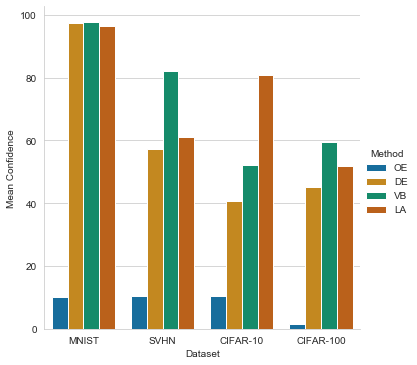

In [5]:
%matplotlib inline
import numpy as np
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tikzplotlib
sns.set_palette('colorblind')
sns.set_style('whitegrid')


methods = ['MAP-oe', 'DE-plain', 'LLVB-plain', 'DLA-plain']
method2str = {
    'MAP-plain': 'MAP', 'MAP-oe': 'OE', 'DE-plain': 'DE', 
    'LLVB-plain': 'VB', 'LLVB-ood': 'LLVB+',
    'DLA-plain': 'LA', 'DLA-ood': 'DLA+'
}
metric2str = {'acc': 'Acc.', 'mmc': 'MMC', 'ece': 'ECE',
              'brier': 'Brier', 'loglik': 'LogLik'}
dset2str = {'MNIST': 'MNIST', 'FMNIST': 'F-MNIST', 'CIFAR10': 'CIFAR-10', 'CIFAR100': 'CIFAR-100', 'SVHN': 'SVHN'}

datasets = ['MNIST', 'SVHN', 'CIFAR10', 'CIFAR100']

path = f'../results/OOD/imagenet/'


def plot():
    means = []
    
    for dset in datasets:
        vals = np.load(f'{path+dset}/mmc.npy', allow_pickle=True).item()
        vals = pd.DataFrame(vals)
        vals = vals.drop(columns=[col for col in vals.columns if col not in methods])
        vals = pd.DataFrame(vals).transpose()  # Dataset-major
        vals = vals['UniformNoise']

        for method in methods:
            row = {'Dataset': dset2str[dset], 'Method': method2str[method], 'Mean Confidence': np.mean(vals[method])}
            means.append(row)

    df = pd.DataFrame(means)
    sns.catplot(data=df, kind='bar', x='Dataset', y='Mean Confidence', hue='Method')
    tikzplotlib.save(f'figs/conf_uniform.tex')
    plt.show()
    
    
plot()